In [70]:
import numpy as np
import pandas as pd

import pro_version as MLR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import make_pipeline


import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv("infor_Data.csv")

# Train - Test Split

In [72]:
# Splitting the DataFrame into training and testing sets with a 70-30 split ratio
# and specifying a random seed for reproducibility
train, test = train_test_split(df, test_size = 0.3, random_state=40)

# Split the data again to simplify the problem with curr practice
x_train = train.iloc[:, :-1] # All columns except the last one
y_train = train.iloc[:, -1]  # The last column

x_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5630, 9)
(5630,)
(2413, 9)
(2413,)


# Normalize the dataset

In [73]:
scaler = StandardScaler()
# Fit the scaler on the training data
scaler.fit(x_train)

# Scale the training data
x_train_scaler = scaler.transform(x_train)

# Scale the test data using the same scaler
x_test_scaler = scaler.transform(x_test)

# Linear Regression by Model Built-in

In [74]:
# Create Linear Regression model
model = LinearRegression()

# Fit model to data
model.fit(x_train_scaler, y_train)

# Prediction
y_pred = model.predict(x_test_scaler)

y_pred = y_pred.reshape(-1, 1)
print(y_pred.shape)

(2413, 1)


# Linear regression by Model Built-self

In [75]:
"""Manual"""
model_Manual = MLR.Multiple_LinearRegression()

# Compute coeficient
model_Manual.fit(x_train, y_train)

# Predicttion
y_predManual = model_Manual.predict(x_test)

print(y_predManual.shape)

(2413, 1)


# Simple Evaluation

In [76]:
print(model_Manual.MSE(y_test, y_pred))

5513.8635243797535


# Evaluate the model using K-fold Cross-Validation

In [81]:
linear_reg_cv = LinearRegression()
scaler = StandardScaler()

# Create a pipeline that combines scaling and linear regression
pipeline = make_pipeline(StandardScaler(),  LinearRegression())

# Define the number of splits and set up cross-validation
kf = KFold(n_splits=6, shuffle=True, random_state=0) 


# Define the scoring metrics to be used during cross-validation
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']

# Perform cross-validation on the pipeline using the specified scoring metrics
result = cross_validate(pipeline, x_train, y_train, cv=kf, return_train_score=True, scoring=scoring)

# Calculate the mean and standard deviation of each scoring metric
MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
MAE_std = (-result['test_neg_mean_absolute_error']).std()
MSE_mean = (-result['test_neg_mean_squared_error']).mean()
MSE_std = (-result['test_neg_mean_squared_error']).std()
RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result['test_r2'].mean()
R2_Score_std = result['test_r2'].std()

# Create a DataFrame to display the mean and standard deviation of each scoring metric
pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])

,Mean,Std
MAE,37.289934,0.469135
MSE,2194.293207,57.240772
RMSE,46.839346,0.607335
R2-Score,0.433233,0.020660


# Visualized Result


In [82]:
df_comp = pd.DataFrame({'Actual':y_test, 'Predicted':y_predManual.reshape(-1)})
print(df_comp)

      Actual   Predicted
520   181.50  166.811798
5230  135.00  159.446776
133   235.00  185.665556
5646  209.38  206.615783
1224  119.94  171.286089
...      ...         ...
7661  343.56  187.988579
692   165.25  181.584688
7356   62.50  137.970601
7685  141.25  158.690144
4806  112.88  159.719580

[2413 rows x 2 columns]


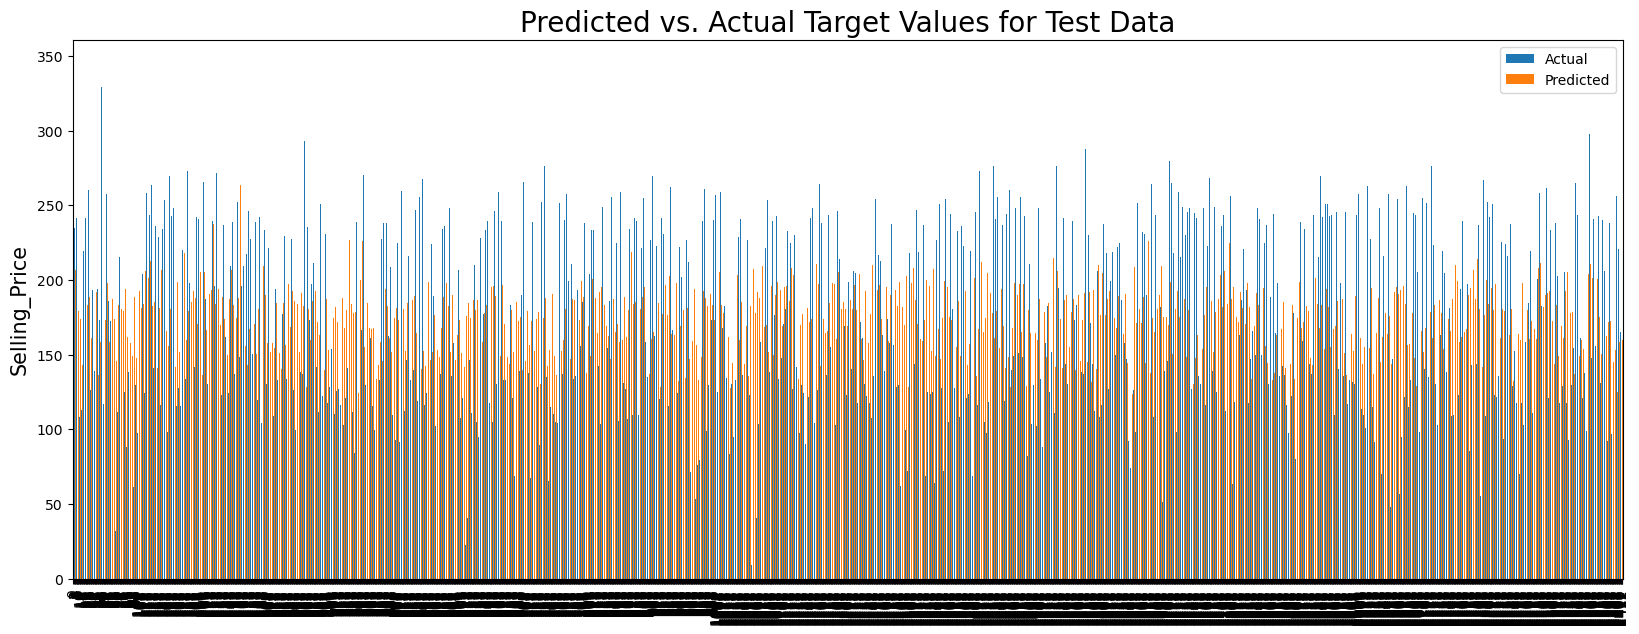

In [83]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Selling_Price', fontsize=15)
    plt.show()

compare_plot(df_comp)